In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
#importing datasets
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [10]:
test_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [11]:
(train_data['Age'].isnull().sum())/len(train_data)*100

19.865319865319865

In [12]:
(test_data['Age'].isnull().sum())/len(test_data)*100

20.574162679425836

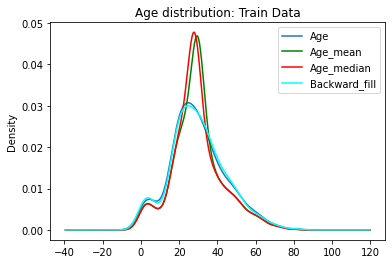

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_data['Age'].plot(kind='kde',ax=ax)
train_data['Age'].fillna(train_data['Age'].mean()).plot(kind='kde',ax=ax,color='green')
train_data['Age'].fillna(train_data['Age'].median()).plot(kind='kde',ax=ax,color='red')
train_data['Age'].fillna(method='bfill').plot(kind='kde',ax=ax,color='cyan')
labels = ['Age','Age_mean','Age_median','Backward_fill']
plt.title('Age distribution: Train Data')
ax.legend(labels=labels, loc='best')
plt.show()

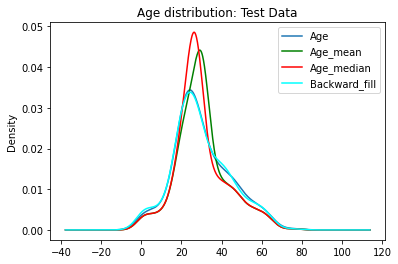

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
test_data['Age'].plot(kind='kde',ax=ax)
test_data['Age'].fillna(test_data['Age'].mean()).plot(kind='kde',ax=ax,color='green')
test_data['Age'].fillna(test_data['Age'].median()).plot(kind='kde',ax=ax,color='red')
test_data['Age'].fillna(method='bfill').plot(kind='kde',ax=ax,color='cyan')
labels = ['Age','Age_mean','Age_median','Backward_fill']
plt.title('Age distribution: Test Data')
ax.legend(labels=labels, loc='best')
plt.show()

In [15]:
train_data['Age'].fillna(method='bfill').isna().sum()

0

In [16]:
test_data['Age'].isna().sum()

86

In [17]:
(train_data['Cabin'].isnull().sum())/len(train_data)*100

77.10437710437711

In [18]:
(test_data['Cabin'].isnull().sum())/len(test_data)*100

78.22966507177034

In [19]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [20]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
367,368,1,3,female,NaN,0,0,7.2292,C
869,870,1,3,male,4.0,1,1,11.1333,S
409,410,0,3,female,NaN,3,1,25.4667,S
877,878,0,3,male,19.0,0,0,7.8958,S
700,701,1,1,female,18.0,1,0,227.5250,C


In [21]:
test_data.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
174,1066,3,male,40.0,1,5,31.3875,S
172,1064,3,male,23.0,1,0,13.9000,S
369,1261,2,male,29.0,0,0,13.8583,C
338,1230,2,male,25.0,0,0,31.5000,S
279,1171,2,male,22.0,0,0,10.5000,S


In [22]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train_data['Age'].fillna(method='bfill',inplace=True)
test_data['Age'].fillna(method='bfill',inplace=True)
test_data['Age'].fillna(method='ffill',inplace=True)

In [24]:
si = SimpleImputer(strategy='most_frequent')
temp = pd.DataFrame(si.fit_transform(train_data[['Embarked']])).reset_index()

In [25]:
temp.drop('index',axis=1,inplace=True)

In [26]:
temp.rename(columns={0:'Embarked_New'},inplace=True)

In [27]:
temp.isnull().sum()

Embarked_New    0
dtype: int64

In [28]:
train_data = pd.concat([train_data,temp],axis=1)

In [29]:
train_data.drop('Embarked',axis=1,inplace=True)

In [30]:
train_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked_New    0
dtype: int64

In [31]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_New
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [32]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [33]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
print('Total people died were {}'.format(train_data['Survived'].value_counts()[0]))
print('Total people survived were {}'.format(train_data['Survived'].value_counts()[1]))

Total people died were 549
Total people survived were 342


In [35]:
print('No. of people in CLASS 3: {}'.format(train_data['Pclass'].value_counts()[3]))
print('No. of people in CLASS 1: {}'.format(train_data['Pclass'].value_counts()[1]))
print('No. of people in CLASS 2: {}'.format(train_data['Pclass'].value_counts()[2]))

No. of people in CLASS 3: 491
No. of people in CLASS 1: 216
No. of people in CLASS 2: 184


In [36]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train_data['Age'].describe()

count    891.000000
mean      29.870561
std       14.597668
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
train_data['Family_members'] = train_data['SibSp'] + train_data['Parch']

In [40]:
test_data['Family_members'] = test_data['SibSp'] + test_data['Parch']

In [41]:
train_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [42]:
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [43]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_New,Family_members
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [44]:
train_data.rename(columns={'Embarked_New':'Embarked'},inplace=True)

In [45]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [46]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_members
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,1
2,894,2,male,62.0,9.6875,Q,0
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,2


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

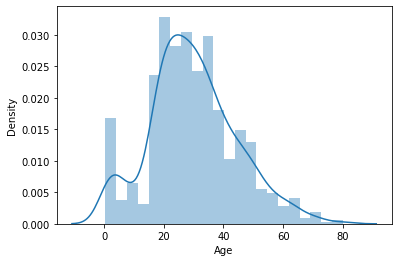

In [47]:
sns.distplot(train_data['Age'])

In [48]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

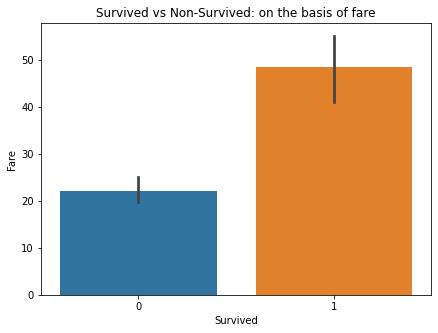

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(x=train_data['Survived'], y=train_data['Fare'])
plt.title('Survived vs Non-Survived: on the basis of fare')
plt.show()

Survived people had payed more fare than the once who died

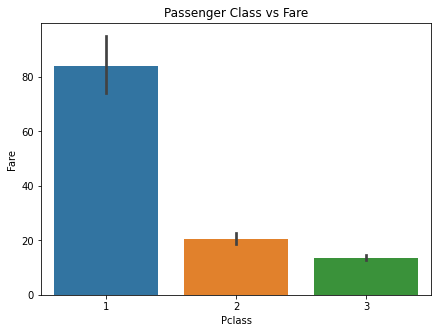

In [50]:
plt.figure(figsize=(7,5))
sns.barplot(x=train_data['Pclass'], y=train_data['Fare'])
plt.title('Passenger Class vs Fare')
plt.show()

Fare comparision order: Class 1 > Class 2 > Class 3

In [51]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

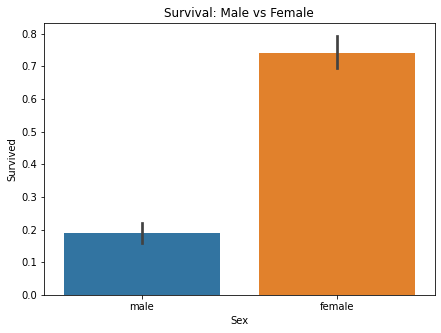

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(x=train_data['Sex'], y=train_data['Survived'])
plt.title('Survival: Male vs Female')
plt.show()
#,hue=train_data['Sex']

Female survival rate was higher than male

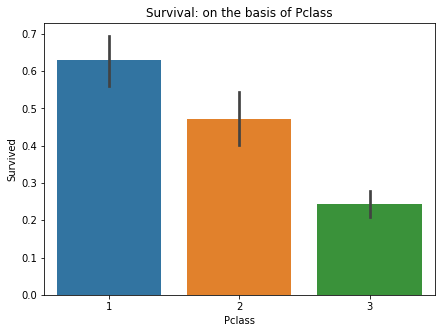

In [53]:
plt.figure(figsize=(7,5))
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])
plt.title('Survival: on the basis of Pclass')
plt.show()

Survival Rate comparison order: Class 1 > Class 2 > Class 3

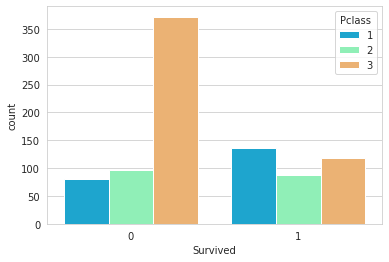

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette='rainbow')
plt.show()

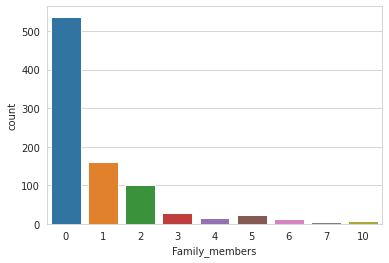

In [55]:
sns.countplot(x='Family_members', data=train_data)
plt.show()

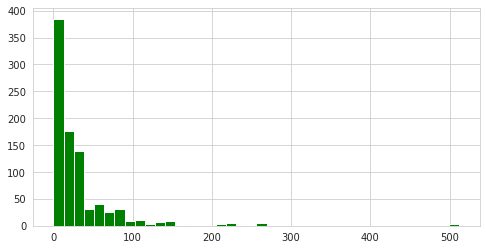

In [56]:
train_data['Fare'].hist(color='green', bins=40,figsize=(8,4))
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

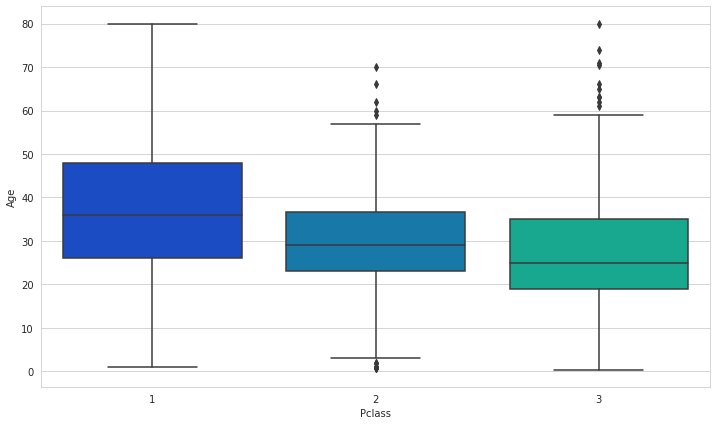

In [57]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='winter')

In [58]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
pd.get_dummies(test_data['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [60]:
sex_train = pd.get_dummies(train_data['Sex'],drop_first=True)
embark_train = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [61]:
sex_test = pd.get_dummies(test_data['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'],drop_first=True)

In [62]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [63]:
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [64]:
train_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_members
0,1,0,3,22.0,7.2500,1
1,2,1,1,38.0,71.2833,1
2,3,1,3,26.0,7.9250,0
3,4,1,1,35.0,53.1000,1
4,5,0,3,35.0,8.0500,0


In [65]:
test_data.head()

,PassengerId,Pclass,Age,Fare,Family_members
0,892,3,34.5,7.8292,0
1,893,3,47.0,7.0000,1
2,894,2,62.0,9.6875,0
3,895,3,27.0,8.6625,0
4,896,3,22.0,12.2875,2


In [66]:
train_data = pd.concat([train_data,sex_train,embark_train],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_members,male,Q,S
0,1,0,3,22.0,7.2500,1,1,0,1
1,2,1,1,38.0,71.2833,1,0,0,0
2,3,1,3,26.0,7.9250,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,1


In [67]:
test_data = pd.concat([test_data,sex_test,embark_test],axis=1)

In [68]:
test_data.head()

,PassengerId,Pclass,Age,Fare,Family_members,male,Q,S
0,892,3,34.5,7.8292,0,1,1,0
1,893,3,47.0,7.0000,1,0,0,1
2,894,2,62.0,9.6875,0,1,1,0
3,895,3,27.0,8.6625,0,1,0,1
4,896,3,22.0,12.2875,2,0,0,1


In [69]:
train_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,Fare,Family_members,male,Q,S
0,1,3,22.0,7.2500,1,1,0,1
1,2,1,38.0,71.2833,1,0,0,0
2,3,3,26.0,7.9250,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,1
4,5,3,35.0,8.0500,0,1,0,1


In [70]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [72]:
x_train = train_data.drop(['Survived'],axis=1)
y_train = train_data['Survived']
x_test = test_data.copy()
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [73]:
x_train

,PassengerId,Pclass,Age,Fare,Family_members,male,Q,S
0,1,3,22.0,7.2500,1,1,0,1
1,2,1,38.0,71.2833,1,0,0,0
2,3,3,26.0,7.9250,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,1
4,5,3,35.0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,0,1,0,1
887,888,1,19.0,30.0000,0,0,0,1
888,889,3,26.0,23.4500,3,0,0,1
889,890,1,26.0,30.0000,0,1,0,0


In [74]:
x_test

,PassengerId,Pclass,Age,Fare,Family_members,male,Q,S
0,892,3,34.5,7.8292,0,1,1,0
1,893,3,47.0,7.0000,1,0,0,1
2,894,2,62.0,9.6875,0,1,1,0
3,895,3,27.0,8.6625,0,1,0,1
4,896,3,22.0,12.2875,2,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,39.0,8.0500,0,1,0,1
414,1306,1,39.0,108.9000,0,0,0,0
415,1307,3,38.5,7.2500,0,1,0,1
416,1308,3,38.5,8.0500,0,1,0,1


In [75]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [76]:
# logreg = LogisticRegression(solver='lbfgs', max_iter=400)
# logreg.fit(x_train, y_train)
# y_pred = logreg.predict(x_test)

In [77]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [78]:
my_submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
my_submission.to_csv('gender_submission.csv', index=False)